created on: Thu Jan 16 16:29:48 2020
<br>
Group 7
<br>
@author: C.L.

<h1>Group 7 - Images sociales<span class="tocSkip"></span>
    
<br>    
<center>SeatGuru Confusion matrix<center>

# Introduction
This notebook aims to analyse scores resulting from our models, after all images went through the pipeline.
TO CORRRRRRRRRRRRRRRRRRRRRRR
Depending on the chosen aircraft manufacturer, you would have to change the `type_ext` and `type_int` lists.

# Environment
To ensure a proper functioning of this code file, `python 3.6` or later version is required.
## Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import collections
import math
from sklearn.metrics import confusion_matrix
import seaborn as sns
import itertools

In [3]:
%load_ext watermark
%watermark -p matplotlib,seaborn,sklearn

matplotlib 3.1.1
seaborn 0.9.0
sklearn 0.21.3


## Parameters

In [10]:
project_path = './../'
pred_path = project_path + 'Results/'
stats_path = project_path + 'ImagesStats/'
pred_file_name = 'pred_SEATGURU_4'

## Data

In [14]:
# Retreive predictions DataFrame and ground truth DataFrame
df_pred = pd.read_csv(pred_path + pred_file_name + '.csv', sep=';')
df_real = pd.read_csv(stats_path + 'g7_SEATGURU_annotate.csv', sep=';')

df_pred.rename(columns={'img': 'name', 'view': 'view_pred'}, inplace=True)

# Merge --> 'x' columns: ground truth; 'y': pred
df = pd.merge(df_pred, df_real)

## Functions

In [16]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() if normalize else cm.max()
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="black" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="black" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(
        accuracy, misclass))
    plt.show()

# Confusion matrices

## Confusion matrix for view model

In [18]:
y_true_view = list(df['view'])
y_pred_view = list(df['view_pred'])
labels_view = ['Int', 'Ext', 'Ext_Int', 'Meal']
confusion_matrix_view = confusion_matrix(
    y_true_view, y_pred_view, labels=labels_view)

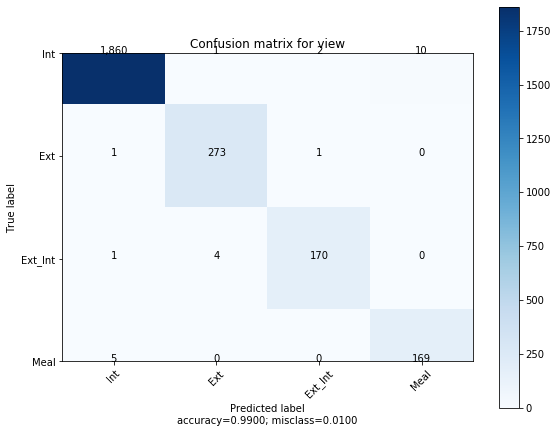

In [19]:
plot_confusion_matrix(confusion_matrix_view, labels_view,
                      title='Confusion matrix for view', normalize=False)

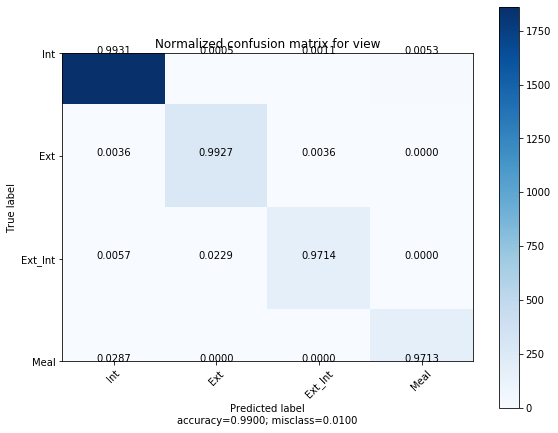

In [20]:
plot_confusion_matrix(confusion_matrix_view, labels_view, title='Normalized confusion matrix for view',
                      normalize=True)

## Confusion matrix for exterior aircraft manufacturers

In [21]:
# Ground truth View = 'Ext'
df_ext = df.loc[df['view'] == 'Ext']

# Confusion matrix for exteriors
y_true_ext = list(df_ext['aircraft_manufacturer'])
y_pred_ext = list(df_ext['manufacturer'])
labels_ext_man = ['Airbus', 'Boeing']

confusion_matrix_ext = confusion_matrix(
    y_true_ext, y_pred_ext, labels=labels_ext_man)

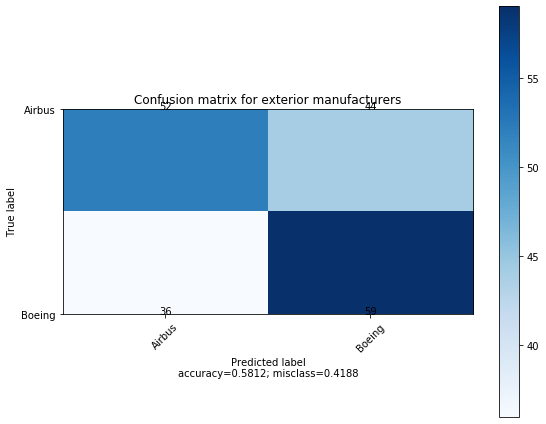

In [22]:
plot_confusion_matrix(confusion_matrix_ext, labels_ext_man, title='Confusion matrix for exterior manufacturers',
                      normalize=False)

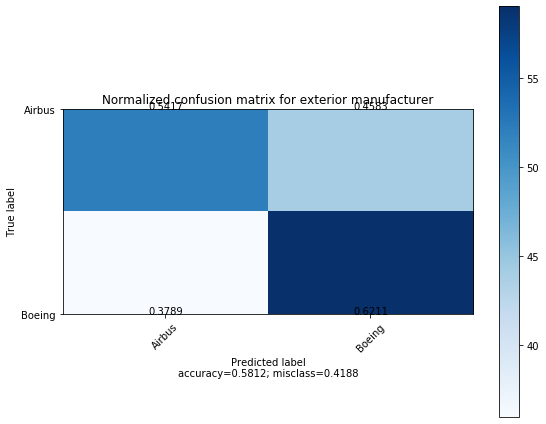

In [23]:
plot_confusion_matrix(confusion_matrix_ext, labels_ext_man,
                      title='Normalized confusion matrix for exterior manufacturer', normalize=True)

## Confusion matrix for exterior aircraft types (Airbus and Boeing)

In [24]:
# Create a new matrix which contains only aircraft types of interest
df_col = list(df.columns)
df_constructeur_ext = pd.DataFrame(columns=df_col)

# Aircrafts
labels_mod = list(df['type'].unique())
del labels_mod[0]  # drop NaNs
labels_mod = sorted(labels_mod)

# Row indexes when aircraft type is in labels (aircraft types of interest)
list_ = list()
for i in range(len(df)):
    if df['aircraft_type'][i] in labels_mod:
        list_.append(i)

df_constructeur_ext = df.iloc[list_]
df_constructeur_ext = df_constructeur_ext.loc[df_constructeur_ext['view'] == 'Ext']

In [25]:
# Confusion matrix for exterior aircraft types
y_true_ext_mod = list(df_constructeur_ext['aircraft_type'])
y_pred_ext_mod = list(df_constructeur_ext['type'])
confusion_matrix_ext_mod = confusion_matrix(
    y_true_ext_mod, y_pred_ext_mod, labels=labels_mod)

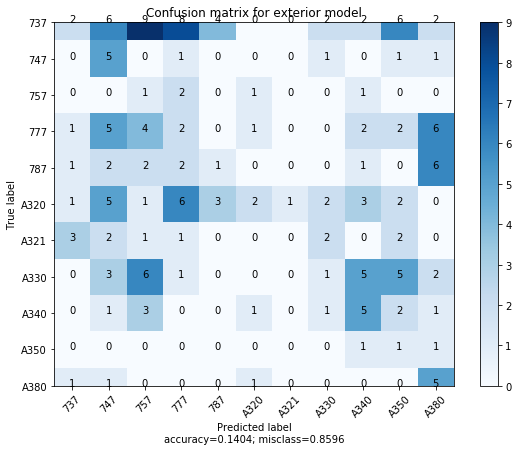

In [26]:
plot_confusion_matrix(confusion_matrix_ext_mod, labels_mod,
                      title='Confusion matrix for exterior model', normalize=False)

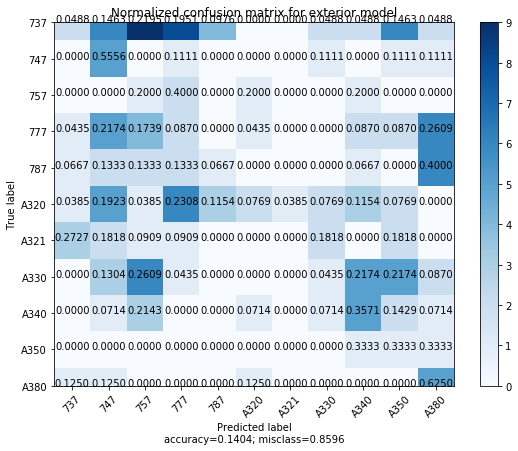

In [27]:
plot_confusion_matrix(confusion_matrix_ext_mod, labels_mod,
                      title='Normalized confusion matrix for exterior model', normalize=True)

## Confusion matrix for interior aircraft manufacturers

In [28]:
# Grounf truth iew = 'Int'
df_int = df.loc[df['view'] == 'Int']

# Confusion matrix for exterior
y_true_int = list(df_int['aircraft_manufacturer'])
y_pred_int = list(df_int['manufacturer'])
labels_int_man = ['Airbus', 'Boeing']

confusion_matrix_int = confusion_matrix(
    y_true_int, y_pred_int, labels=labels_int_man)

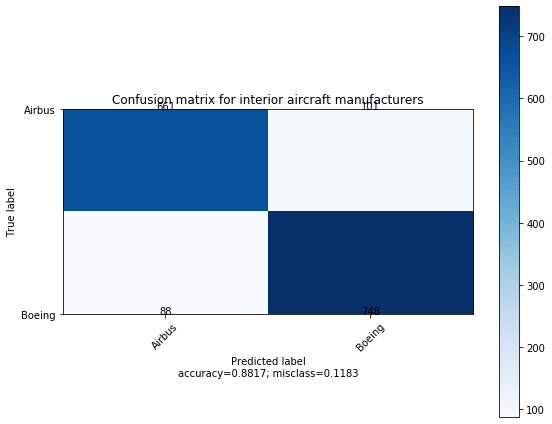

In [29]:
plot_confusion_matrix(confusion_matrix_int, labels_int_man,
                      title='Confusion matrix for interior aircraft manufacturers', normalize=False)

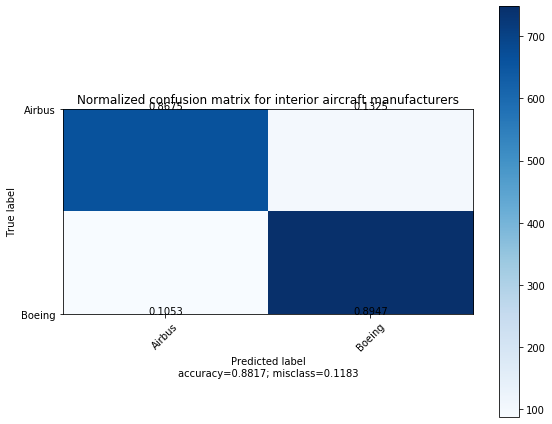

In [30]:
plot_confusion_matrix(confusion_matrix_int, labels_int_man,
                      title='Normalized confusion matrix for interior aircraft manufacturers', normalize=True)

## Confusion matrix for interior aircraft types (Airbus and Boeing)

In [32]:
# Create a new matrix which contains only aircraft types of interest
df_col = list(df.columns)

# Aircrafts
labels_mod_int = list(df['type'].unique())
del labels_mod_int[0]  # drop NaNs
labels_mod_int = sorted(labels_mod_int)

# Row indexes when aircraft type is in labels (aircraft types of interest)
list_int = list()
for i in range(len(df)):
    if df['aircraft_type'][i] in labels_mod_int:
        list_int.append(i)

df_models_int = df.iloc[list_int]
df_models_int = df_models_int.loc[df_models_int['view'] == 'Int']

In [33]:
# Confusion matrix for exterior aircraft types
y_true_int_mod = list(df_models_int['aircraft_type'])
y_pred_int_mod = list(df_models_int['type'])
confusion_matrix_int_mod = confusion_matrix(
    y_true_int_mod, y_pred_int_mod, labels=labels_mod_int)

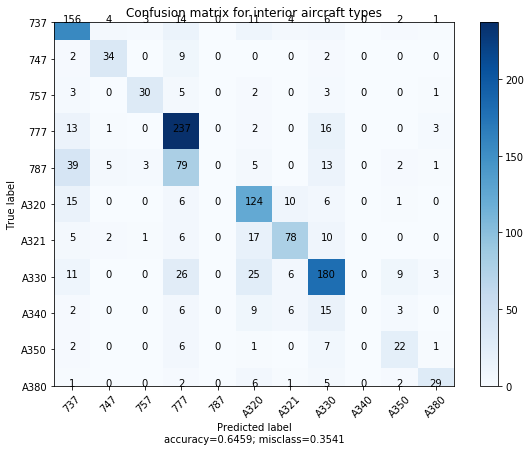

In [34]:
plot_confusion_matrix(confusion_matrix_int_mod, labels_mod_int,
                      title='Confusion matrix for interior aircraft types', normalize=False)

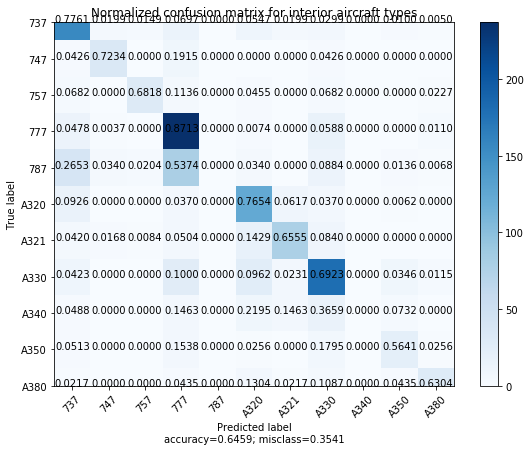

In [35]:
plot_confusion_matrix(confusion_matrix_int_mod, labels_mod_int,
                      title='Normalized confusion matrix for interior aircraft types', normalize=True)

# Precision/recall function

In [37]:
# counts the number of true positives, false positives, true negatives, false negatives
def precision_recall(real_value, pred_value, val):
    nb_tp = 0
    nb_fn = 0
    nb_fp = 0
    nb_tn = 0

    for i in real_value.index:
        # True positive
        if real_value[i] == val and pred_value[i] == val:
            nb_tp += 1
        # False negative
        if real_value[i] == val and pred_value[i] != val:
            nb_fn += 1
        # False positive
        if real_value[i] != val and pred_value[i] == val:
            nb_fp += 1
        # True negative
        if real_value[i] != val and pred_value[i] != val:
            nb_tn += 1

    if nb_tp > 0 and nb_fp > 0:
        precision = nb_tp / (nb_tp + nb_fp)
    else:
        precision = 0
    if nb_tp > 0 and nb_tn > 0:
        recall = nb_tp / (nb_tp + nb_fn)
    else:
        recall = 0

    # return nb_tp
    return 'Class: ' + val, 'Precision ={:0.4f} , Recall = {:0.4f}'.format(precision, recall)

## First model : Int, Ext, Ext_Int, Meal

In [38]:
pr_int = precision_recall(df['view'], df['view_pred'], 'Int')
pr_ext = precision_recall(df['view'], df['view_pred'], 'Ext')
pr_ei = precision_recall(df['view'], df['view_pred'], 'Ext_Int')
pr_meal = precision_recall(df['view'], df['view_pred'], 'Meal')

## Exterior manufacturer: Airbus or Boeing

In [39]:
# Predict value = 'Ext'
df_ext = df.loc[df['view_pred'] == 'Ext']

# Airbus
pr_ext_airbus = precision_recall(
    df_ext['aircraft_manufacturer'], df_ext['manufacturer'], 'Airbus')

# Boeing
pr_ext_boeing = precision_recall(
    df_ext['aircraft_manufacturer'], df_ext['manufacturer'], 'Boeing')

## Exterior: Airbus aircraft types

In [40]:
df_ext_Airbus = df_ext.loc[df['manufacturer'] == 'Airbus']

# A320
pr_ext_A320 = precision_recall(
    df_ext_Airbus['aircraft_type'], df_ext_Airbus['type'], 'A320')

# A321
pr_ext_A321 = precision_recall(
    df_ext_Airbus['aircraft_type'], df_ext_Airbus['type'], 'A321')

# A330
pr_ext_A330 = precision_recall(
    df_ext_Airbus['aircraft_type'], df_ext_Airbus['type'], 'A330')

# A350
pr_ext_A350 = precision_recall(
    df_ext_Airbus['aircraft_type'], df_ext_Airbus['type'], 'A350')

## Exterior: Boeing aircraft types

In [41]:
df_ext_Boeing = df_ext.loc[df['manufacturer'] == 'Boeing']

# 737
pr_ext_737 = precision_recall(
    df_ext_Boeing['aircraft_type'], df_ext_Boeing['type'], '737')

# 747
pr_ext_747 = precision_recall(
    df_ext_Boeing['aircraft_type'], df_ext_Boeing['type'], '747')

# 757
pr_ext_757 = precision_recall(
    df_ext_Boeing['aircraft_type'], df_ext_Boeing['type'], '757')

# 777
pr_ext_777 = precision_recall(
    df_ext_Boeing['aircraft_type'], df_ext_Boeing['type'], '777')

## Interior manufacturer: Airbus or Boeing

In [42]:
df_int = df.loc[df['view_pred'] == 'Int']

# Airbus
pr_int_airbus = precision_recall(
    df_int['aircraft_manufacturer'], df_int['manufacturer'], 'Airbus')

# Boeing
pr_int_boeing = precision_recall(
    df_int['aircraft_manufacturer'], df_int['manufacturer'], 'Boeing')

## Interiors: Airbus aircraft types

In [43]:
df_int_Airbus = df_int.loc[df['manufacturer'] == 'Airbus']

# A320
pr_int_A320 = precision_recall(
    df_int_Airbus['aircraft_type'], df_int_Airbus['type'], 'A320')

# A321
pr_int_A321 = precision_recall(
    df_int_Airbus['aircraft_type'], df_int_Airbus['type'], 'A321')

# A330
pr_int_A330 = precision_recall(
    df_int_Airbus['aircraft_type'], df_int_Airbus['type'], 'A330')

# A350
pr_int_A350 = precision_recall(
    df_int_Airbus['aircraft_type'], df_int_Airbus['type'], 'A350')

## Interiors: Boeing aircraft types

In [44]:
df_int_Boeing = df_int.loc[df['manufacturer'] == 'Boeing']

# 737
pr_int_737 = precision_recall(
    df_int_Boeing['aircraft_type'], df_int_Boeing['type'], '737')

# 747
pr_int_747 = precision_recall(
    df_int_Boeing['aircraft_type'], df_int_Boeing['type'], '747')

# 757
pr_int_757 = precision_recall(
    df_int_Boeing['aircraft_type'], df_int_Boeing['type'], '757')

# 777
pr_int_777 = precision_recall(
    df_int_Boeing['aircraft_type'], df_int_Boeing['type'], '777')

# Hitsogram

In [45]:
df.isnull().sum()

name                       0
view_pred                  0
view_proba                 0
manufacturer             369
manufacturer_proba       650
type                     369
type_proba               369
aircraft_manufacturer      0
aircraft_type            401
view                       0
format                     0
height                     0
width                      0
height_to_width            0
ncol                       0
dtype: int64

In [48]:
def histogram(df, column, filter_1=None, filter_2=None, type_col=['pred', 'real']):
    list_view = ['Int', 'Ext', 'Ext_Int', 'Meal']
    list_aircraftmanufacturer = ['Airbus', 'Boeing']
    list_aircrafttype = ['A320', 'A321', 'A330',
                         'A350', '737', '747' '757', '777']
    hist = {}
    for i in range(len(df)):
        if df[column][i] in list_aircrafttype or df[column][i] in list_view or df[column][i] in list_aircraftmanufacturer:

            if filter_1 != None and type_col == 'pred' and df['view_pred'][i] == filter_1:
                if df[column][i] in hist:
                    hist[df[column][i]] += 1
                else:
                    hist[df[column][i]] = 1

            if filter_1 != None and type_col == 'real' and df['view'][i] == filter_1:
                if df[column][i] in hist:
                    hist[df[column][i]] += 1
                else:
                    hist[df[column][i]] = 1

            if filter_2 != None and type_col == 'pred' and df['manufacturer'][i] == filter_2 and filter_1 != None and type_col == 'pred' and df['view_pred'][i] == filter_1:
                if df[column][i] in hist:
                    hist[df[column][i]] += 1
                else:
                    hist[df[column][i]] = 1

            if filter_2 != None and type_col == 'real' and df['aircraft_manufacturer'][i] == filter_2 and filter_1 != None and type_col == 'real' and df['view'][i] == filter_1:
                if df[column][i] in hist:
                    hist[df[column][i]] += 1
                else:
                    hist[df[column][i]] = 1

            if filter_1 == None and filter_2 == None:
                if df[column][i] in hist:
                    hist[df[column][i]] += 1
                else:
                    hist[df[column][i]] = 1
    return collections.OrderedDict(sorted(hist.items()))

In [49]:
def display_hist(histogram, color='b'):
    plt.bar(histogram.keys(), histogram.values(), color=color)

### repartition view

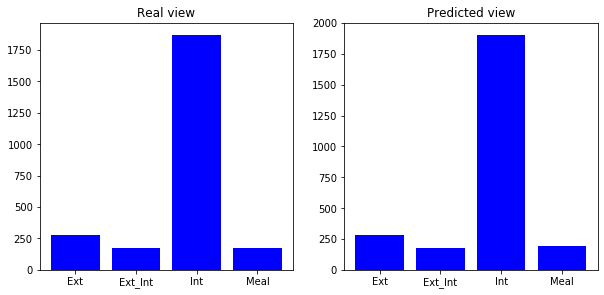

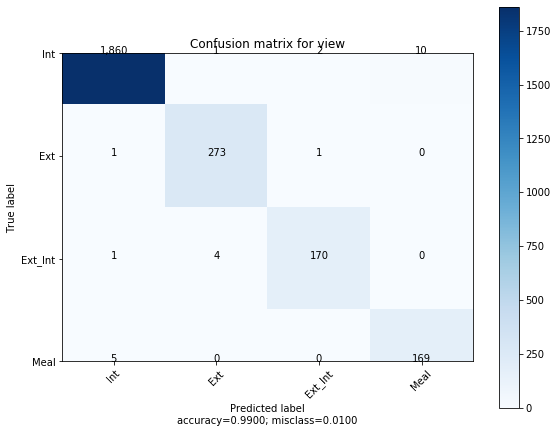

('Class: Int', 'Precision =0.9759 , Recall = 0.9931') 
 ('Class: Ext', 'Precision =0.9715 , Recall = 0.9927') 
 ('Class: Ext_Int', 'Precision =0.9551 , Recall = 0.9714') 
 ('Class: Meal', 'Precision =0.8848 , Recall = 0.9713')


In [50]:
plt.figure(figsize=(10,10))
plt.subplot(223)
display_hist(histogram(df, 'view'))#real
plt.title('Real view')
plt.subplot(224)
display_hist(histogram(df, 'view_pred')) #prediction
plt.title('Predicted view')
#plt.subplot(212)
plot_confusion_matrix(confusion_matrix_view, labels_view, title = 'Confusion matrix for view' , normalize=False)
print(pr_int, '\n', pr_ext, '\n', pr_ei, '\n', pr_meal)

### repartition exterior constructor

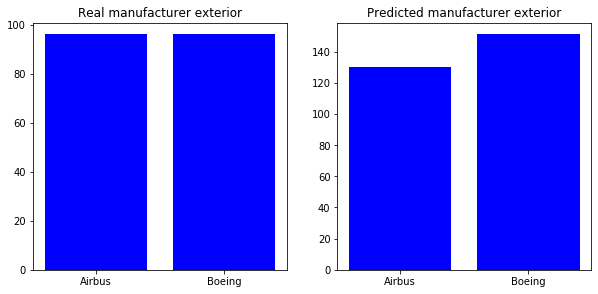

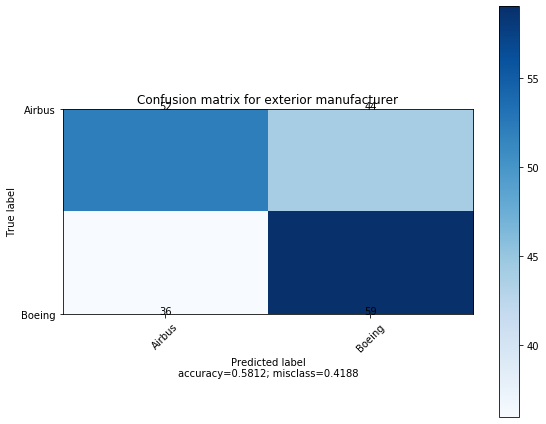

('Class: Airbus', 'Precision =0.4231 , Recall = 0.5446') 
 ('Class: Boeing', 'Precision =0.3907 , Recall = 0.6211')


In [51]:
plt.figure(figsize=(10,10))
plt.subplot(223)
display_hist(histogram(df, 'aircraft_manufacturer', filter_1 = 'Ext', type_col = 'real'))
plt.title('Real manufacturer exterior')
plt.subplot(224)
display_hist(histogram(df, 'manufacturer', filter_1 = 'Ext', type_col = 'pred'))
plt.title('Predicted manufacturer exterior')
#plt.subplot(212)
plot_confusion_matrix(confusion_matrix_ext, labels_ext_man, title = 'Confusion matrix for exterior manufacturer',
                      normalize=False)
print(pr_ext_airbus, '\n', pr_ext_boeing)

###  repartition modele exterior

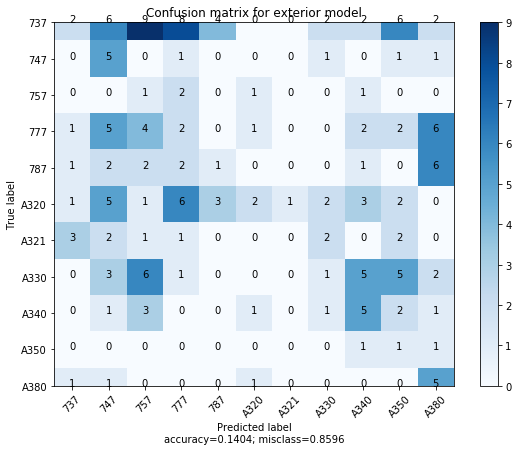

('Class: A320', 'Precision =0.2222 , Recall = 0.2000') 
 ('Class: A321', 'Precision =0.0000 , Recall = 0.0000') 
 ('Class: A330', 'Precision =0.0667 , Recall = 0.0714') 
 ('Class: A350', 'Precision =0.0345 , Recall = 0.3333') 
 ('Class: 737', 'Precision =0.1538 , Recall = 0.0690') 
 ('Class: 747', 'Precision =0.1111 , Recall = 0.8333') 
 ('Class: 757', 'Precision =0.0213 , Recall = 0.3333') 
 ('Class: 777', 'Precision =0.0690 , Recall = 0.1667')


In [108]:
plot_confusion_matrix(confusion_matrix_ext_mod, labels_mod,
                      title = 'Confusion matrix for exterior model' , normalize=False)
print(pr_ext_A320, '\n', pr_ext_A321, '\n', pr_ext_A330, '\n', pr_ext_A350, '\n',
      pr_ext_737, '\n', pr_ext_747, '\n', pr_ext_757, '\n', pr_ext_777)

### repartition interior constructor

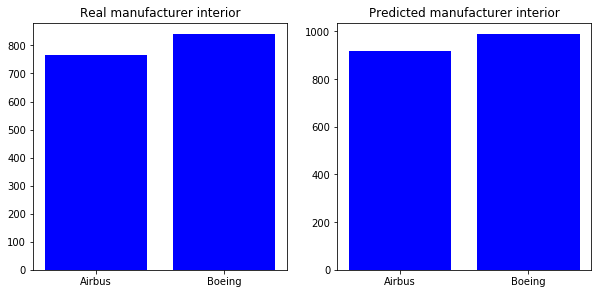

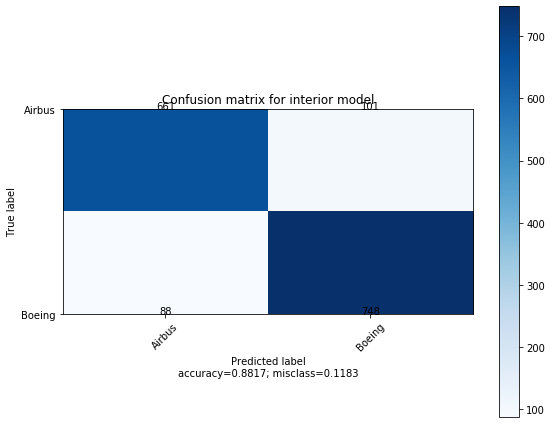

('Class: Airbus', 'Precision =0.7323 , Recall = 0.8628') 
 ('Class: Boeing', 'Precision =0.7690 , Recall = 0.8815')


In [105]:
plt.figure(figsize=(10,10))
plt.subplot(223)
display_hist(histogram(df, 'aircraft_manufacturer', filter_1 = 'Int', type_col = 'real'))
plt.title('Real manufacturer interior')
plt.subplot(224)
display_hist(histogram(df, 'manufacturer', filter_1 = 'Int', type_col = 'pred'))
plt.title('Predicted manufacturer interior')
plot_confusion_matrix(confusion_matrix_int, labels_int_man,
                      title = 'Confusion matrix for interior model' , normalize=False)
print(pr_int_airbus, '\n', pr_int_boeing )

### repartition modele interior

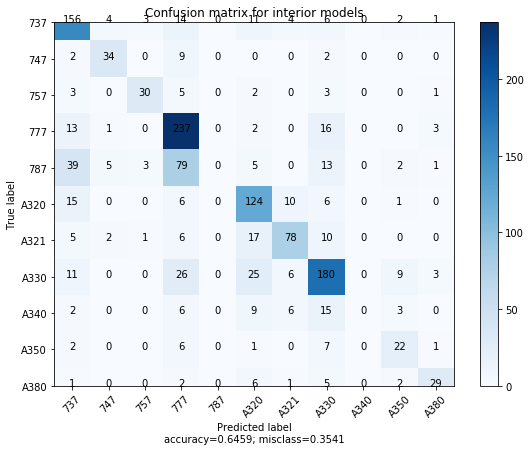

('Class: A320', 'Precision =0.3788 , Recall = 0.8681') 
 ('Class: A321', 'Precision =0.5270 , Recall = 0.7358') 
 ('Class: A330', 'Precision =0.5433 , Recall = 0.8018') 
 ('Class: A350', 'Precision =0.4151 , Recall = 0.6875') 
 ('Class: 737', 'Precision =0.4329 , Recall = 0.8778') 
 ('Class: 747', 'Precision =0.5484 , Recall = 0.7391') 
 ('Class: 757', 'Precision =0.6522 , Recall = 0.7500') 
 ('Class: 777', 'Precision =0.4630 , Recall = 0.9444')


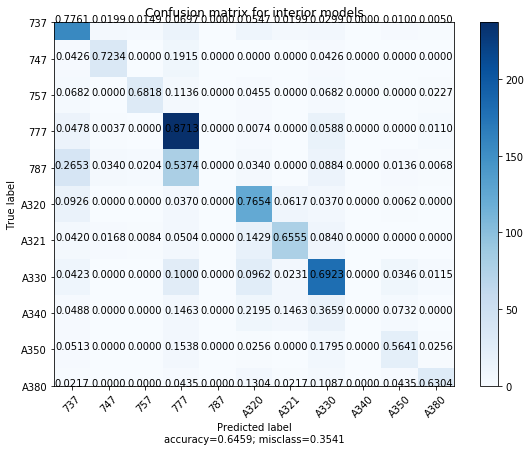

('Class: A320', 'Precision =0.3788 , Recall = 0.8681') 
 ('Class: A321', 'Precision =0.5270 , Recall = 0.7358') 
 ('Class: A330', 'Precision =0.5433 , Recall = 0.8018') 
 ('Class: A350', 'Precision =0.4151 , Recall = 0.6875') 
 ('Class: 737', 'Precision =0.4329 , Recall = 0.8778') 
 ('Class: 747', 'Precision =0.5484 , Recall = 0.7391') 
 ('Class: 757', 'Precision =0.6522 , Recall = 0.7500') 
 ('Class: 777', 'Precision =0.4630 , Recall = 0.9444')


In [107]:
plot_confusion_matrix(confusion_matrix_int_mod, labels_mod_int,
                      title = 'Confusion matrix for interior models' , normalize=False)
print(pr_int_A320, '\n', pr_int_A321, '\n',pr_int_A330, '\n', pr_int_A350, '\n',
      pr_int_737, '\n', pr_int_747, '\n',pr_int_757, '\n', pr_int_777)
plot_confusion_matrix(confusion_matrix_int_mod, labels_mod_int,
                      title = 'Confusion matrix for interior models' , normalize=True)
print(pr_int_A320, '\n', pr_int_A321, '\n',pr_int_A330, '\n', pr_int_A350, '\n',
      pr_int_737, '\n', pr_int_747, '\n',pr_int_757, '\n', pr_int_777)
